Dans cet exemple, nous construisons un graphe complet dont les sommets sont les stations de métro de Bruxelles. On attribue à chaque arête la distance (à vol d'oiseau) séparant ses deux extrémités. Nous recherchons ensuite un arbre couvrant minimal dans ce graphe.

In [1]:
import geopy as gp
from geopy import distance
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
import sys
sys.path.append("../source_code")
from MST import *

In [2]:
stations_raw = """
1 	Gare de l'Ouest 	Weststation 	1982 	NMBS/SNCB, Line 2, Line 5, Line 6 	50°50′56″N 4°19′15″E
2 	Beekkant 	Beekkant 	1981 	Line 2, Line 5, Line 6 	50°51′13″N 4°19′22″E
3 	Étangs Noirs 	Zwarte Vijvers 	1981 	Line 5 	50°51′25″N 4°19′57″E
4 	Comte de Flandre 	Graaf van Vlaanderen 	1981 	Line 5 	50°51′17″N 4°20′24″E
5 	Sainte-Catherine 	Sint-Katelijne 	1977 	Line 5 	50°51′08″N 4°20′52″E
6 	De Brouckère 	De Brouckère 	1976 	Line 3, Line 4, Line 5 	50°51′03″N 4°21′08″E
7 	Gare Centrale 	Centraal Station 	1976 	Line 5, NMBS/SNCB 	50°50′44″N 4°21′25″E
8 	Parc 	Park 	1976 	Line 5 	50°50′48″N 4°21′45″E
9 	Arts-Loi 	Kunst-Wet 	1976 	Line 2, Line 5, Line 6 	50°50′44″N 4°22′07″E
10 	Maelbeek 	Maalbeek 	1976 	Line 5 	50°50′38″N 4°22′35″E
11 	Schuman 	Schuman 	1976 	Line 5, NMBS/SNCB 	50°50′34″N 4°22′54″E
12 	Mérode 	Mérode 	1976 	Line 5, NMBS/SNCB 	50°50′22″N 4°23′52″E
13 	Montgomery 	Montgomery 	1976 	None, Outer Ring Axis,Line 7 	50°50′16″N 4°24′25″E
14 	Joséphine-Charlotte 	Joséphine-Charlotte 	1976 	None 	50°50′24″N 4°24′46″E
15 	Gribaumont 	Gribaumont 	1976 	None 	50°50′33″N 4°25′3″E
16 	Tomberg 	Tomberg 	1976 	None 	50°50′37″N 4°25′29″E
17 	Roodebeek 	Roodebeek 	1982 	None 	50°50′51″N 4°26′9″E
18 	Vandervelde 	Vandervelde 	1982 	None 	50°50′51″N 4°26′54″E
19 	Alma 	Alma 	1982 	None 	50°50′59″N 4°27′12″E
20 	Crainhem 	Kraainem 	1988 	None 	50°50′56″N 4°27′31″E
21 	Stockel 	Stokkel 	1988 	None 	50°50′29″N 4°27′52″E
1 	Simonis & Elisabeth 	Simonis & Elisabeth 	1982 	NMBS/SNCB, Line 2, Line 6, Line 6 	50°51′47″N 4°19′50″E
2 	Osseghem 	Ossegem 	1982 	Line 6 	50°51′25″N 4°19′30″E
3 	Beekkant 	Beekkant 	1981 	Line 1, Line 5, Line 6 	50°51′13″N 4°19′22″E
4 	Gare de l'Ouest 	Weststation 	1982 	NMBS/SNCB, Line 1, Line 5, Line 6 	50°50′56″N 4°19′15″E
5 	Delacroix 	Delacroix 	2006 	Line 6 	50°50′42″N 4°19′28″E
6 	Clemenceau 	Clemenceau 	1993 	Line 6 	50°50′28″N 4°19′50″E
7 	Gare du Midi 	Zuidstation 	1988 	NMBS/SNCB, Thalys, Eurostar, ICE, Line 2, Line 4, Line 6 	50°50′11″N 4°20′17″E
8 	Porte de Hal 	Hallepoort 	1988 	Line 6 	50°50′1″N 4°20′36″E
9 	Hôtel des Monnaies 	Munthof 	1988 	Line 6 	50°50′0″N 4°20′58″E
10 	Louise 	Louiza 	1988 	Line 6 	50°50′9″N 4°21′19″E
11 	Porte de Namur 	Naamsepoort 	1988 	Line 6 	50°50′18″N 4°21′44″E
12 	Trône 	Troon 	1988 	Line 6 	50°50′28″N 4°21′59″E
13 	Arts-Loi 	Kunst-Wet 	1988 	Line 1, Line 5, Line 6 	50°50′44″N 4°22′07″E
14 	Madou 	Madou 	1988 	Line 6 	50°51′0″N 4°22′8″E
15 	Botanique 	Kruidtuin 	1988 	Line 6 	50°51′13″N 4°21′57″E
16 	Rogier 	Rogier 	1988 	Line 3, Line 4, Line 6 	50°51′19″N 4°21′30″E
17 	Yser 	IJzer 	1988 	Line 6 	50°51′26″N 4°21′6″E
18 	Ribaucourt 	Ribaucourt 	1988 	Line 6 	50°51′38″N 4°20′24″E
19 	Simonis & Elisabeth 	Simonis & Elisabeth 	1988 	NMBS/SNCB, Line 2, Line 6, Line 6 	50°51′47″N 4°19′50″E
1 	Erasme 	Erasmus 	2003 	None 	50°48′54″N 4°16′0″E
2 	Eddy Merckx 	Eddy Merckx 	2003 	None 	50°49′00″N 4°16′31″E
3 	CERIA 	COOVI 	2003 	None 	50°48′58″N 4°17′24″E
4 	La Roue 	Het Rad 	2003 	None 	50°49′15″N 4°17′37″E
5 	Bizet 	Bizet 	1992 	None 	50°49′30″N 4°17′52″E
6 	Veeweyde 	Veeweide 	1985 	None 	50°49′42″N 4°18′0″E
7 	Saint-Guidon 	Sint-Guido 	1982 	None 	50°50′06″N 4°18′20″E
8 	Aumale 	Aumale 	1982 	None 	50°50′22″N 4°18′44″E
9 	Jacques Brel 	Jacques Brel 	1982 	None 	50°50′42″N 4°19′07″E
10 	Gare de l'Ouest 	Weststation 	1982 	NMBS/SNCB, Line 1, Line 2, Line 6 	50°50′56″N 4°19′15″E
11 	Beekkant 	Beekkant 	1981 	Line 1, Line 2, Line 6 	50°51′13″N 4°19′22″E
12 	Étangs Noirs 	Zwarte Vijvers 	1981 	Line 1 	50°51′25″N 4°19′57″E
13 	Comte de Flandre 	Graaf van Vlaanderen 	1981 	Line 1 	50°51′17″N 4°20′24″E
14 	Sainte-Catherine 	Sint-Katelijne 	1977 	Line 1 	50°51′08″N 4°20′52″E
15 	De Brouckère 	De Brouckère 	1976 	Line 1, Line 3, Line 4 	50°51′03″N 4°21′08″E
16 	Gare Centrale 	Centraal Station 	1976 	Line 1, NMBS/SNCB 	50°50′44″N 4°21′25″E
17 	Parc 	Park 	1976 	Line 1 	50°50′48″N 4°21′45″E
18 	Arts-Loi 	Kunst-Wet 	1976 	Line 1, Line 2, Line 6 	50°50′44″N 4°22′07″E
19 	Maelbeek 	Maalbeek 	1976 	Line 1 	50°50′38″N 4°22′35″E
20 	Schuman 	Schuman 	1976 	Line 1, NMBS/SNCB 	50°50′34″N 4°22′54″E
21 	Mérode 	Mérode 	1976 	Line 1, NMBS/SNCB 	50°50′22″N 4°23′52″E
22 	Thieffry 	Thieffry 	1976 	None 	50°49′58″N 4°24′6″E
23 	Pétillon 	Pétillon 	1976 	None 	50°49′38″N 4°24′13″E
24 	Hankar 	Hankar 	1976 	None 	50°49′18″N 4°24′20″E
25 	Delta 	Delta 	1976 	None 	50°49′08″N 4°24′15″E
26 	Beaulieu 	Beaulieu 	1976 	None 	50°48′54″N 4°24′34″E
27 	Demey 	Demey 	1977 	None 	50°48′48″N 4°25′15″E
28 	Herrmann-Debroux 	Herrmann-Debroux 	1985 	None 	50°48′45″N 4°25′41″E
1 	Roi Baudouin 	Koning Boudewijn 	1998 	None 	50°53′47″N 4°19′40″E
2 	Heysel 	Heizel 	1985 	Line 7 	50°53′47″N 4°20′12″E
3 	Houba-Brugmann 	Houba-Brugmann 	1985 	None 	50°53′25″N 4°20′13″E
4 	Stuyvenbergh 	Stuyvenbergh 	1985 	None 	50°53′10″N 4°20′30″E
5 	Bockstael 	Bockstael 	1982 	None 	50°52′39″N 4°20′51″E
6 	Pannenhuis 	Pannenhuis 	1982 	None 	50°52′22″N 4°20′31″E
7 	Belgica 	Belgica 	1982 	None 	50°52′4″N 4°20′10″E
8 	Simonis & Elisabeth 	Simonis & Elisabeth 	1982 	NMBS/SNCB, Line 2, Line 2, Line 6 	50°51′47″N 4°19′50″E
9 	Osseghem 	Ossegem 	1982 	Line 2 	50°51′25″N 4°19′30″E
10 	Beekkant 	Beekkant 	1981 	Line 1, Line 2, Line 5 	50°51′13″N 4°19′22″E
11 	Gare de l'Ouest 	Weststation 	1982 	NMBS/SNCB, Line 1, Line 2, Line 5 	50°50′56″N 4°19′15″E
12 	Delacroix 	Delacroix 	2006 	Line 2 	50°50′42″N 4°19′28″E
13 	Clemenceau 	Clemenceau 	1993 	Line 2 	50°50′28″N 4°19′50″E
14 	Gare du Midi 	Zuidstation 	1988 	NMBS/SNCB, Thalys, Eurostar, ICE, Line 2, Line 3, Line 4 	50°50′11″N 4°20′17″E
15 	Porte de Hal 	Hallepoort 	1988 	Line 2 	50°50′1″N 4°20′36″E
16 	Hôtel des Monnaies 	Munthof 	1988 	Line 2 	50°50′0″N 4°20′58″E
17 	Louise 	Louiza 	1988 	Line 2 	50°50′9″N 4°21′19″E
18 	Porte de Namur 	Naamsepoort 	1988 	Line 2 	50°50′18″N 4°21′44″E
19 	Trône 	Troon 	1988 	Line 2 	50°50′28″N 4°21′59″E
20 	Arts-Loi 	Kunst-Wet 	1988 	Line 1, Line 2, Line 5 	50°50′44″N 4°22′07″E
21 	Madou 	Madou 	1988 	Line 2 	50°51′0″N 4°22′8″E
22 	Botanique 	Kruidtuin 	1988 	Line 2 	50°51′13″N 4°21′57″E
23 	Rogier 	Rogier 	1988 	Line 2, Line 3, Line 4 	50°51′19″N 4°21′30″E
24 	Yser 	IJzer 	1988 	Line 2 	50°51′26″N 4°21′6″E
25 	Ribaucourt 	Ribaucourt 	1988 	Line 2 	50°51′38″N 4°20′24″E
26 	Simonis & Elisabeth 	Simonis & Elisabeth 	1988 	NMBS/SNCB, Line 2, Line 2, Line 6 	50°51′47″N 4°19′50″E
"""

Source : https://en.wikipedia.org/wiki/List_of_Brussels_Metro_stations

Les deux cellules suivantes vont extraire de nos données le nom, la latitude et la longitude de chaque station (et convertire les deux dernières en degrés décimaux).

In [3]:
stations_list = [s.split("\t") for s in stations_raw.splitlines()[1:]]
stations = [{"nom": s[1][:-1], "latitude": s[-1].split()[0], "longitude":s[-1].split()[1]} for s in stations_list]

In [4]:
for i in range(len(stations)):
    s = stations[i]
    lat, long = s["latitude"], s["longitude"]
    degrees, minutes, seconds, direction = re.split('[°′″]', lat)
    lat = int(degrees) + gp.units.degrees(arcminutes=int(minutes), arcseconds=int(seconds))
    degrees, minutes, seconds, direction = re.split('[°′″]', long)
    long = int(degrees) + gp.units.degrees(arcminutes=int(minutes), arcseconds=int(seconds))
    s["latitude"], s["longitude"] = lat, long

In [5]:
bxl = nx.Graph()
bxl.add_nodes_from(s["nom"] for s in stations)
bxl.add_weighted_edges_from((s["nom"], t["nom"], distance.distance((s["latitude"], s["longitude"]), (t["latitude"], t["longitude"])).km) for s in stations for t in stations)

In [6]:
kruskal_sg(bxl)

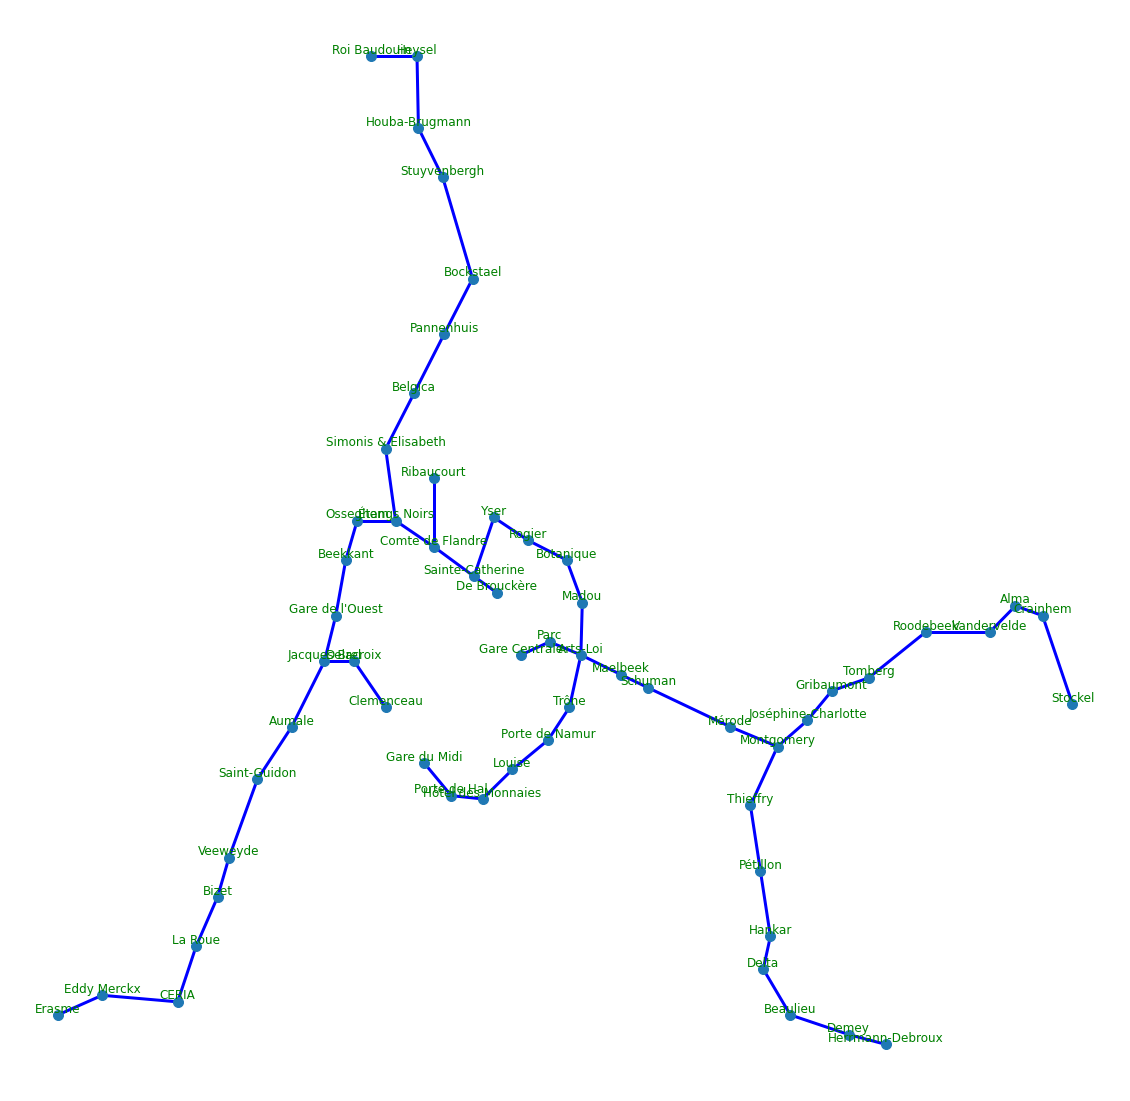

In [7]:
pos = dict()
for s in stations:
    pos[s["nom"]] = (s["longitude"], s["latitude"])
    
plt.figure(1, (20, 20))
nx.draw_networkx_nodes(bxl, pos, node_size=100)
nx.draw_networkx_labels(bxl, pos, font_color='g', verticalalignment="bottom")
nx.draw_networkx_edges(bxl, pos, edgelist=[(u, v) for u, v in bxl.edges if bxl[u][v].get("spanning")], edge_color='b', width=3)

plt.axis("off")
plt.show()